In [140]:
import pandas as pd
import random
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score

In [141]:
# Initialize Faker for generating synthetic customer data
fake = Faker()

In [142]:
# Set random seed for reproducibility
np.random.seed(42)

In [143]:
# Define the number of customers and products
num_customers = 5000  # Adjust based on available memory
num_products = 12  # Define 12 realistic banking products

In [144]:
# Generate unique customer IDs
customer_ids = [fake.uuid4() for _ in range(num_customers)]

In [145]:
# Define realistic banking products
bank_products = [
    "Savings Account", "Current Account", "Fixed Deposit", "Recurring Deposit",
    "Home Loan", "Personal Loan", "Credit Card", "Debit Card",
    "Car Loan", "Mutual Funds", "Insurance Policy", "Gold Loan"
]

In [146]:
# Generate unique product IDs and map them to real product names
product_mapping = {fake.uuid4(): product_name for product_name in bank_products}
product_ids = list(product_mapping.keys())  # Extract product IDs

In [147]:
# Reverse mapping for easy lookup
reverse_product_mapping = {v: k for k, v in product_mapping.items()}

In [148]:
# Possible customer interaction types
interaction_types = ['purchased', 'viewed', 'clicked']


In [149]:
# Generate synthetic transaction data
interaction_data = []
for _ in range(20000):  # Create 20,000 interaction records
    interaction_data.append({
        'customer_id': random.choice(customer_ids),
        'product_id': random.choice(product_ids),
        'interaction_type': random.choice(interaction_types),
        'interaction_date': fake.date_this_decade()
    })

In [150]:
# Create DataFrame
df = pd.DataFrame(interaction_data)

In [151]:
df

,customer_id,product_id,interaction_type,interaction_date
0,677d7f72-346d-4506-9860-9d5ebdc3dc50,0f070ca6-dd6a-4f5c-bc60-42d3d5b45659,viewed,2020-05-23
1,efd27e90-2b40-4d52-91cd-67ea6f831eab,2f46bd9f-2bb5-49ab-8fb1-10a482fc02c9,purchased,2020-05-29
2,599ac96a-0710-4972-a39d-2628dba8eda2,0f070ca6-dd6a-4f5c-bc60-42d3d5b45659,viewed,2022-09-09
3,e22c44f8-7beb-4256-bc48-a1984dc8481a,128e13ec-3d4e-4bf9-a278-15231153e84b,purchased,2021-11-02
4,386b7e5f-7c87-487a-bf6a-04310199a530,b0a1bc20-92a8-45c0-b360-6c0782041612,purchased,2024-06-23
...,...,...,...,...
19995,13ec0520-827d-4e4e-ac5e-80507082e6e9,74baed94-260a-4998-b38a-ae4886f0c1bc,purchased,2023-06-24
19996,40b37535-450e-4403-b27c-ad2d4b901b66,2f46bd9f-2bb5-49ab-8fb1-10a482fc02c9,clicked,2023-12-25
19997,ca2865af-cf2b-4df0-aa1d-040c788d3a2b,3b02ea35-8dae-4b27-b95d-4d96ced26ec0,clicked,2023-11-10
19998,aae8cd0c-21c8-4548-acc1-43e83c8f58f6,afab40a6-9f7f-4d3d-bb5b-fea0df05e21b,viewed,2023-09-03


In [152]:
# Feature Engineering: Add derived attributes
df['interaction_month'] = pd.to_datetime(df['interaction_date']).dt.month
df['interaction_day_of_week'] = pd.to_datetime(df['interaction_date']).dt.dayofweek

In [153]:
# Convert interaction type into a numerical score for recommendations
interaction_mapping = {'purchased': 2, 'viewed': 1, 'clicked': 0}
df['interaction_score'] = df['interaction_type'].map(interaction_mapping)

In [154]:
df.head()

,customer_id,product_id,interaction_type,interaction_date,interaction_month,interaction_day_of_week,interaction_score
0,677d7f72-346d-4506-9860-9d5ebdc3dc50,0f070ca6-dd6a-4f5c-bc60-42d3d5b45659,viewed,2020-05-23,5,5,1
1,efd27e90-2b40-4d52-91cd-67ea6f831eab,2f46bd9f-2bb5-49ab-8fb1-10a482fc02c9,purchased,2020-05-29,5,4,2
2,599ac96a-0710-4972-a39d-2628dba8eda2,0f070ca6-dd6a-4f5c-bc60-42d3d5b45659,viewed,2022-09-09,9,4,1
3,e22c44f8-7beb-4256-bc48-a1984dc8481a,128e13ec-3d4e-4bf9-a278-15231153e84b,purchased,2021-11-02,11,1,2
4,386b7e5f-7c87-487a-bf6a-04310199a530,b0a1bc20-92a8-45c0-b360-6c0782041612,purchased,2024-06-23,6,6,2


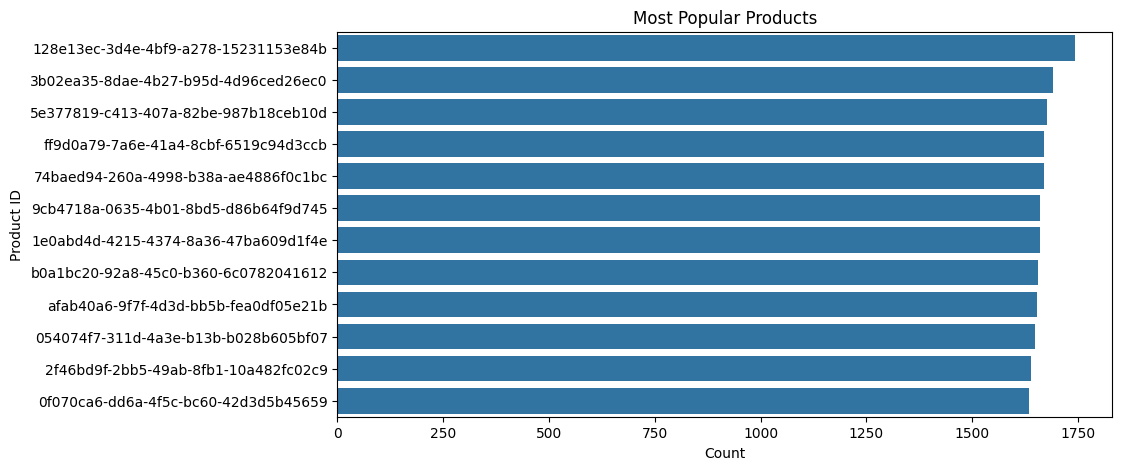

In [155]:
# Distribution of product interactions
plt.figure(figsize=(10, 5))
sns.countplot(y='product_id', data=df, order=df['product_id'].value_counts().index)
plt.title("Most Popular Products")
plt.xlabel("Count")
plt.ylabel("Product ID")
plt.show()

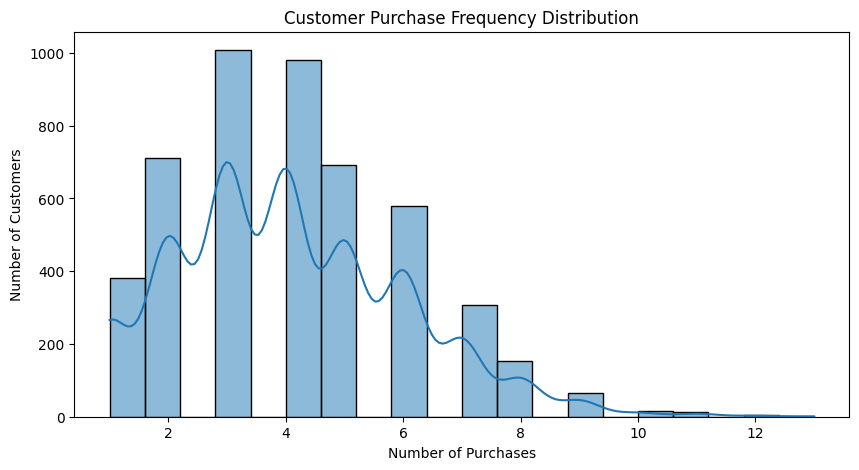

In [156]:
# Customer purchase frequency
customer_activity = df['customer_id'].value_counts()
plt.figure(figsize=(10, 5))
sns.histplot(customer_activity, bins=20, kde=True)
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()

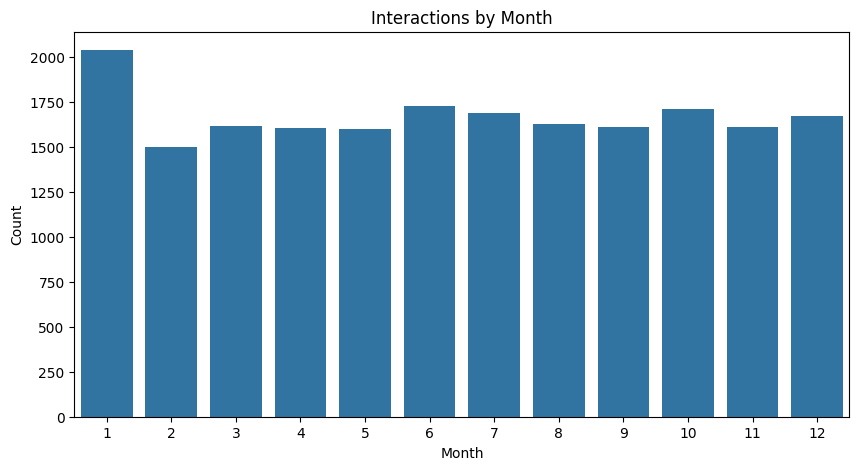

In [157]:
# count of interactions by month
plt.figure(figsize=(10, 5))
sns.countplot(x='interaction_month', data=df)
plt.title("Interactions by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

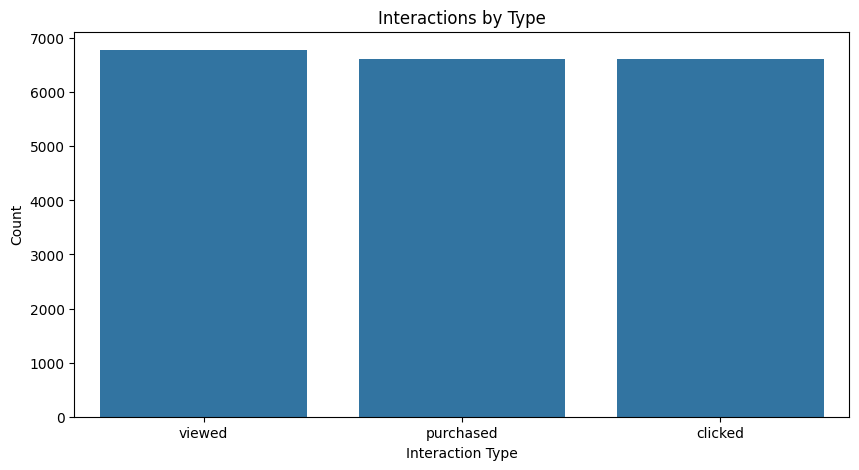

In [158]:
# count of interactions type
plt.figure(figsize=(10, 5))
sns.countplot(x='interaction_type', data=df)
plt.title("Interactions by Type")
plt.xlabel("Interaction Type")
plt.ylabel("Count")
plt.show()

In [159]:
# Pivot table to create a customer-product interaction matrix
interaction_matrix = df.pivot_table(index='customer_id', columns='product_id', values='interaction_score', aggfunc='max', fill_value=0)

In [169]:
interaction_matrix


product_id,054074f7-311d-4a3e-b13b-b028b605bf07,0f070ca6-dd6a-4f5c-bc60-42d3d5b45659,128e13ec-3d4e-4bf9-a278-15231153e84b,1e0abd4d-4215-4374-8a36-47ba609d1f4e,2f46bd9f-2bb5-49ab-8fb1-10a482fc02c9,3b02ea35-8dae-4b27-b95d-4d96ced26ec0,5e377819-c413-407a-82be-987b18ceb10d,74baed94-260a-4998-b38a-ae4886f0c1bc,9cb4718a-0635-4b01-8bd5-d86b64f9d745,afab40a6-9f7f-4d3d-bb5b-fea0df05e21b,b0a1bc20-92a8-45c0-b360-6c0782041612,ff9d0a79-7a6e-41a4-8cbf-6519c94d3ccb
customer_id,,,,,,,,,,,,
0007032a-626a-4beb-829e-8eb6299d692c,0,0,0,0,0,1,0,2,0,0,0,0
000ce1fb-0628-41cf-b1b9-84c337393542,0,0,0,0,0,0,0,0,0,0,0,0
0018a07d-2e4a-4393-bb9c-62c738ca6384,0,0,0,0,0,0,2,0,0,0,0,0
001968da-770e-45d4-bbe8-1f298d3e4e85,0,0,2,2,1,0,0,0,0,2,1,0
002b3013-c72d-47d7-a629-a7a5c7baabfa,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
ffc9852d-c5e8-40aa-b41d-edd7acfc3993,2,1,0,0,2,0,0,0,0,0,0,0
ffcdb6a9-9418-488b-92ba-0b4559927bca,1,0,0,1,0,0,2,0,0,0,0,0
ffd0e04f-5c7c-42d2-adc8-1f15db8075c1,0,0,2,0,0,0,0,0,0,0,2,0


In [160]:
interaction_sparse = csr_matrix(interaction_matrix)

In [161]:
# Train KNN model
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3)
knn.fit(interaction_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=3)

In [162]:
def recommend_products(customer_id):
    if customer_id not in interaction_matrix.index:
        return []
    
    customer_index = interaction_matrix.index.get_loc(customer_id)
    customer_vector = interaction_sparse[customer_index]
    distances, indices = knn.kneighbors(customer_vector)
    
    recommended_products = set()
    for idx in indices[0]:
        if idx != customer_index:
            similar_products = interaction_matrix.iloc[idx]
            recommended_products.update(similar_products[similar_products > 0].index)
    
    return [product_mapping.get(p, "Unknown Product") for p in recommended_products if p in product_mapping][:5]


In [163]:
# Evaluate recommendations
sample_customer = random.choice(interaction_matrix.index)
recommended_products = recommend_products(sample_customer)
true_interactions = (interaction_matrix.loc[sample_customer] > 0).astype(int)

In [164]:
# Convert product names back to IDs for evaluation
recommended_product_ids = [reverse_product_mapping[p] for p in recommended_products if p in reverse_product_mapping]
predicted_interactions = np.zeros(len(interaction_matrix.columns))
for product_id in recommended_product_ids:
    if product_id in interaction_matrix.columns:
        predicted_interactions[interaction_matrix.columns.get_loc(product_id)] = 1


In [165]:
# Calculate precision and recall
precision = precision_score(true_interactions, predicted_interactions, zero_division=0)
recall = recall_score(true_interactions, predicted_interactions, zero_division=0)


In [167]:
# Display results
print(f"Recommended products for customer {sample_customer}: {recommended_products}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Recommended products for customer 9e95a34b-e282-4929-8ea6-3aa9725ad1cf: ['Credit Card', 'Car Loan', 'Current Account', 'Fixed Deposit']
Precision: 0.7500
Recall: 1.0000


In [168]:
# Save model and data
import joblib

joblib.dump(knn, "knn_model.pkl")
joblib.dump(interaction_matrix, "interaction_matrix.pkl")
joblib.dump(product_mapping, "product_mapping.pkl")

print("Model and data saved successfully!")

Model and data saved successfully!
